In [9]:
import geopandas
import tifffile as tiff
import cv2
import matplotlib; matplotlib.rcParams['figure.dpi']=300
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [10]:
with open("./data/match_dict.pkl", "rb") as file:
    match_dict = pickle.load(file)


In [11]:
match_dict

{'_SS12251_140745': '011320_002_N_HR',
 '_SS12251_140908': '011320_002_T_HR',
 '_SS12251_141012': '012320_005_N_TNBC',
 '_SS12251_141106': '012320_005_T_TNBC',
 '_SS12251_141217': '050420_001_N_TNBC',
 '_SS12251_141332': '050420_001_T_TNBC',
 '_SS12251_141451': None,
 '_SS12251_141611': '102720_003_T_TNBC',
 '_SS12251_141731': '011620_002_N_HR',
 '_SS12251_141847': None,
 '_SS12251_142001': '012419_002_N_HER2',
 '_SS12251_142106': '012419_002_T_HER2',
 '_SS12251_142240': '092619_007_N_HER2',
 '_SS12251_142406': '092619_007_T_HER2',
 '_SS12251_142537': '012020_006_N_HR',
 '_SS12251_142720': '012020_006_T_HR'}

In [12]:
file_name = '_SS12251_140745'

gp = geopandas.read_file("./data/_SS12251_140745.geojson")

im_large = tiff.imread("./data/_SS12251_140745.svs")
im_small = cv2.resize(im_large, None, fx=1/15, fy=1/15)

gp['annot']=gp['classification'].map(lambda x: x.get("name","none"))

gp2=gp.copy()
gp2['geometry']=gp2['geometry'].scale(1/15,1/15,origin=(0,0))
gp2['coords'] = gp2['geometry'].apply(lambda x: x.representative_point().coords[:])
gp2['coords'] = [coords[0] for coords in gp2['coords']]

In [14]:
gp2

,object_type,classification,isLocked,geometry,annot,coords
0,annotation,"{'name': 'Fat', 'colorRGB': -1190472}",False,"POLYGON ((3238.33333 556.66667, 3238.33333 558...",Fat,"(3678.85, 1297.2333333333331)"
1,annotation,"{'name': 'Fat', 'colorRGB': -1190472}",False,"POLYGON ((1900.26667 1175.40000, 1892.00000 11...",Fat,"(2158.3766826923074, 1523.6333333333332)"
2,annotation,"{'name': 'Fat', 'colorRGB': -1190472}",False,"POLYGON ((787.13333 1483.20000, 780.20000 1484...",Fat,"(824.6254666666666, 1937.6333333333332)"
3,annotation,"{'name': 'lobule', 'colorRGB': -2028546}",False,"POLYGON ((3173.86667 2160.73333, 3122.13333 21...",lobule,"(3112.0139784946236, 2209.1)"
4,annotation,"{'name': 'lobule', 'colorRGB': -2028546}",False,"POLYGON ((1979.06667 2526.33333, 1978.46667 25...",lobule,"(2076.0254901960784, 2579.5333333333333)"
5,annotation,"{'name': 'duct', 'colorRGB': -2545152}",False,"POLYGON ((1242.66667 1087.40000, 1240.13333 10...",duct,"(1237.3333333333335, 1130.9333333333334)"
6,annotation,"{'name': 'duct', 'colorRGB': -2545152}",False,"POLYGON ((1429.80000 969.13333, 1427.33333 969...",duct,"(1372.4456140350876, 1015.1333333333333)"
7,annotation,"{'name': 'duct', 'colorRGB': -2545152}",False,"POLYGON ((2567.00000 1119.00000, 2565.06667 11...",duct,"(2537.2333333333336, 1214.7333333333331)"
8,annotation,"{'name': 'Normal fibrous stroma', 'colorRGB': ...",False,"POLYGON ((1844.40000 1513.06667, 1769.46667 15...",Normal fibrous stroma,"(1785.9425039872408, 1918.9333333333334)"
9,annotation,"{'name': 'Normal fibrous stroma', 'colorRGB': ...",False,"POLYGON ((2764.93333 1700.66667, 2763.06667 17...",Normal fibrous stroma,"(2529.4466666666667, 2051.0666666666666)"


_SS12251_140745 011320_002_N_HR


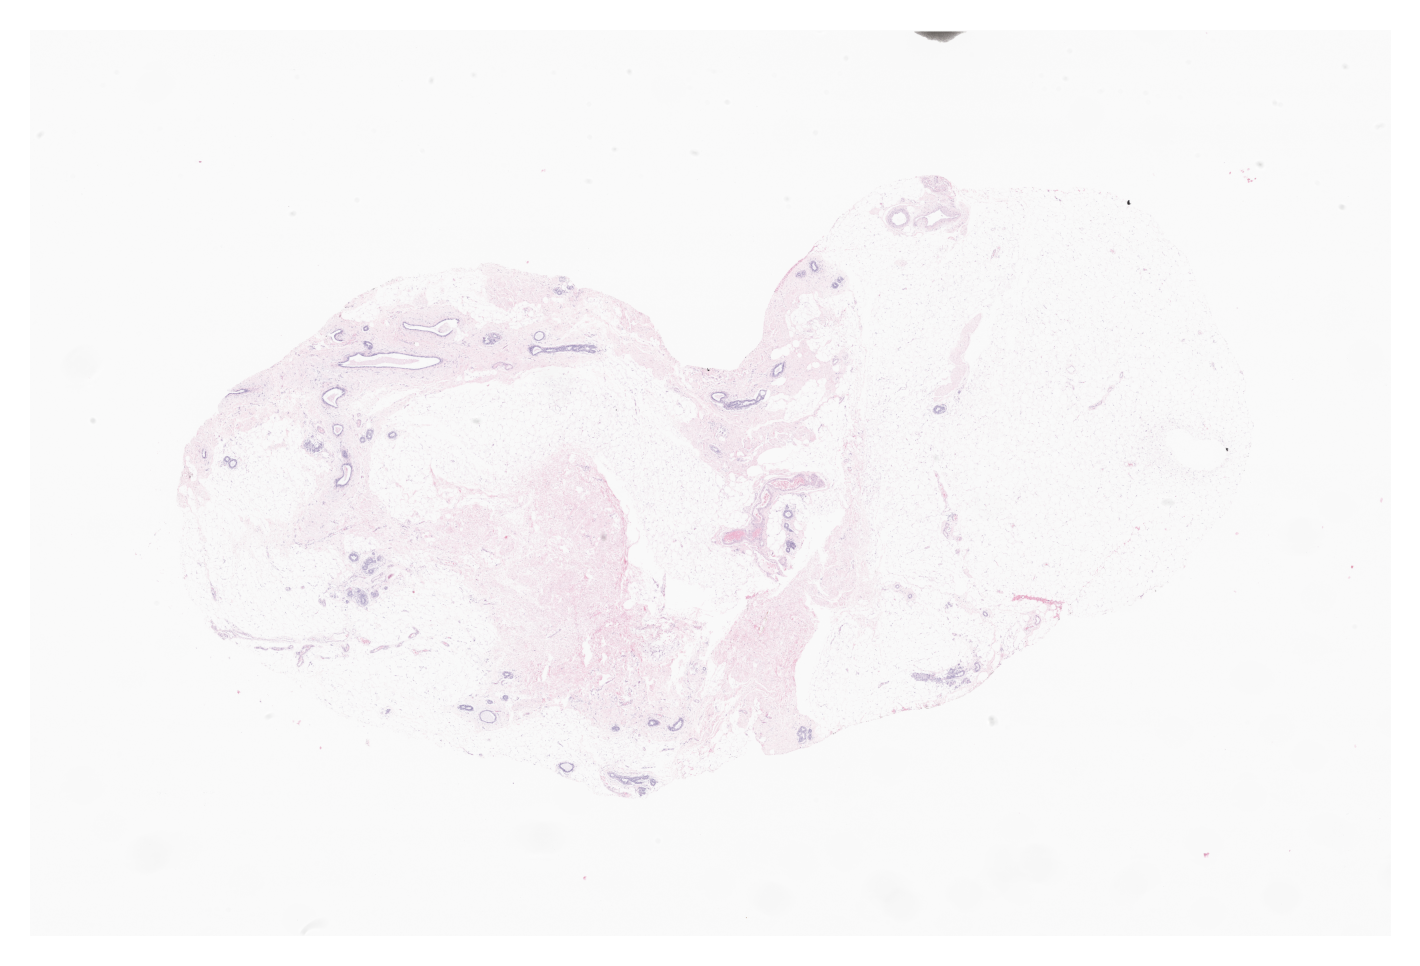

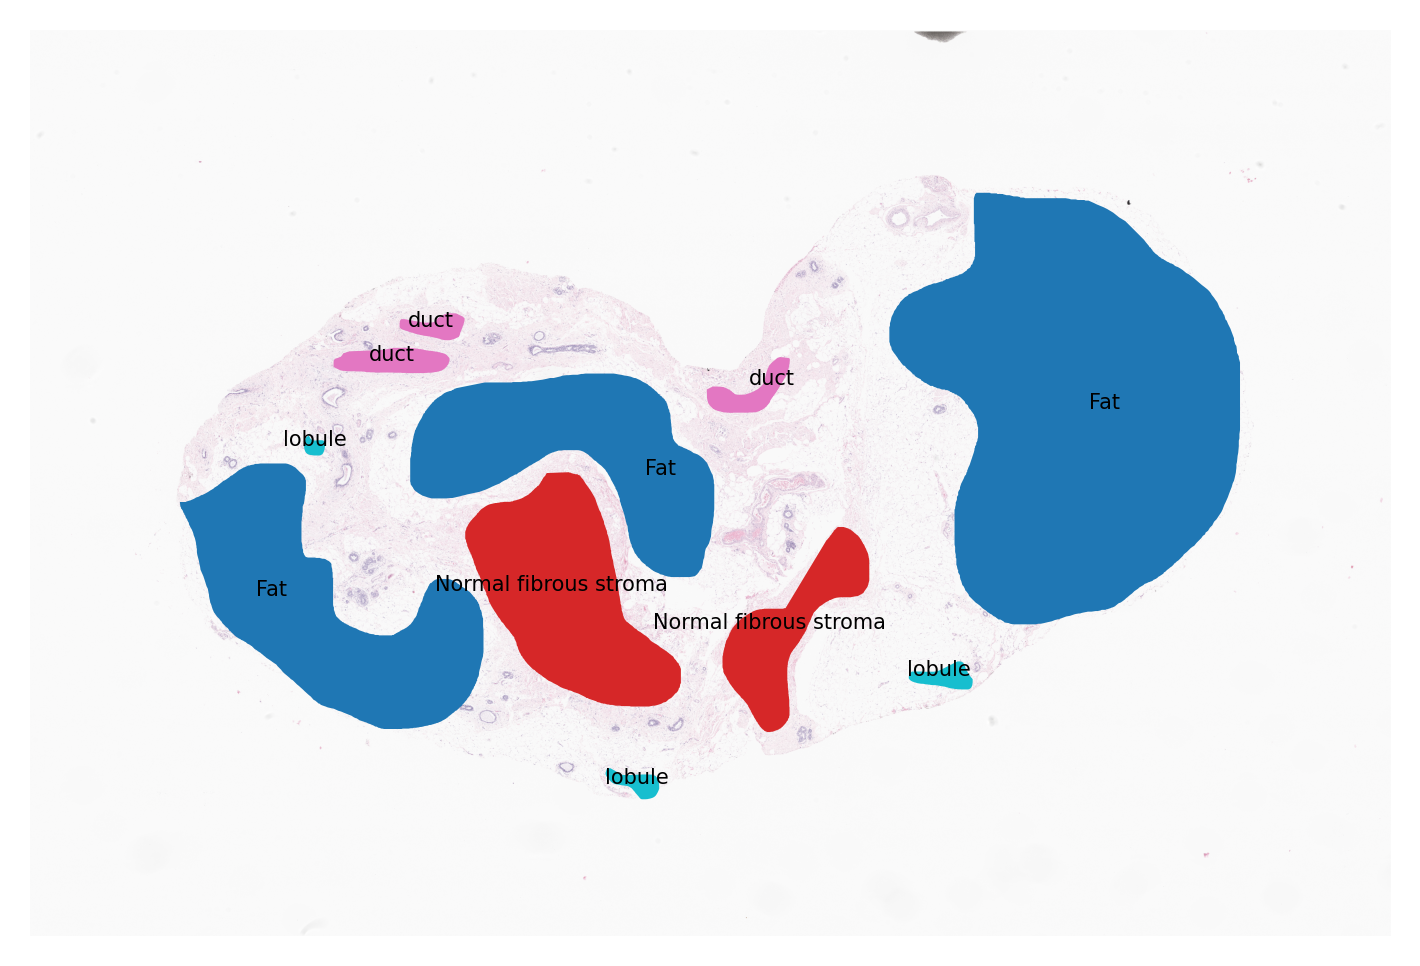

In [13]:
print(file_name, match_dict[file_name])
plt.imshow(im_small)
plt.axis("off")
plt.show()

gp2.plot('annot', aspect=1)
plt.imshow(im_small)
plt.axis("off")
for idx, row in gp2.iterrows():
    plt.annotate(text=row['annot'], xy=row['coords'],
                 horizontalalignment='center',fontsize=5,rotation=0)

In [6]:
with open("./data/011320_002_N_HR_dict.pkl", "rb") as input_file:
    data = pickle.load(input_file)
    

In [7]:
data['metals'].keys()

dict_keys(['Ca44', 'Cu63', 'Fe56', 'Mg24', 'Mn55', 'Na23'])

/Users/luyunrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/luyunrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


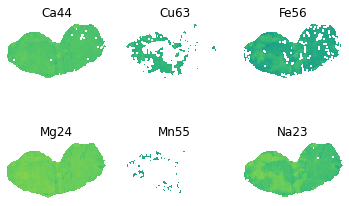

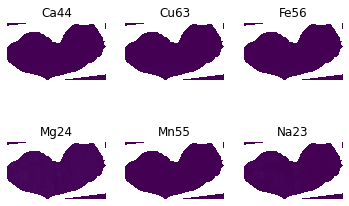

In [8]:
fig, axs = plt.subplots(2, 3)
metal_c = 0
for x in range(2):
    for y in range(3):
        axs[x, y].imshow(np.log(data['metals'][list(data['metals'].keys())[metal_c]])+10)
        axs[x, y].set_title(str(list(data['metals'].keys())[metal_c]))
        axs[x, y].axis('off')
        metal_c += 1
plt.show()

fig, axs = plt.subplots(2, 3)
metal_c = 0
for x in range(2):
    for y in range(3):
        axs[x, y].imshow(data['metals'][list(data['metals'].keys())[metal_c]])
        axs[x, y].set_title(str(list(data['metals'].keys())[metal_c]))
        axs[x, y].axis('off')
        metal_c += 1
plt.show()